# Digits

Run the source code:

In [52]:
%run "code\digits.py"

## Example 7.1

The code below constructs the exact model and verifies it correctly classifies any random image selected from the possible inputs containing digits. The `random_image()` function selects an image from a dataset called `IM` which contains these images.

8


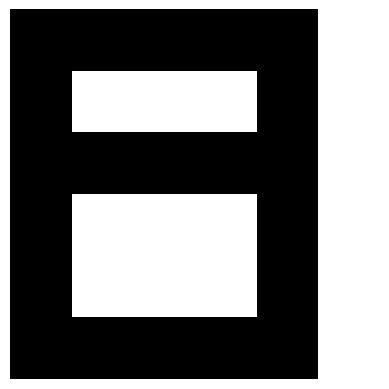

In [53]:
M = make_exact_model()
rand_img = random_image()
print(model_classify(M=M, img=rand_img))
show_digit(rand_img)

We can also test some example images that do not contain a digit, ensuring the model rejects them. An image using the same pixel types as the digits 2 and 5 is of particular interest as rejecting this case required lots of additional nodes in the hidden layers. The matrices in `test` can be modified to verify other cases.

Classification for image 1: Reject
Classification for image 2: Reject
Classification for image 3: Reject


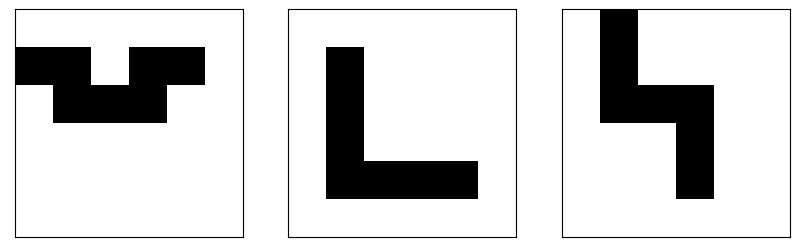

In [54]:
test = np.array(
    [[[0,0,0,0,0,0],
      [1,1,0,1,1,0],
      [0,1,1,1,0,0],
      [0,0,0,0,0,0],
      [0,0,0,0,0,0],
      [0,0,0,0,0,0]],
     [[0,0,0,0,0,0],
      [0,1,0,0,0,0],
      [0,1,0,0,0,0],
      [0,1,0,0,0,0],
      [0,1,1,1,1,0],
      [0,0,0,0,0,0]],
     [[0,1,0,0,0,0],
      [0,1,0,0,0,0],
      [0,1,1,1,0,0],
      [0,0,0,1,0,0],
      [0,0,0,1,0,0],
      [0,0,0,0,0,0]]]
)

fig, axs = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(10,6))
for i in range(3):
    axs[i].imshow(test[i], cmap='Greys')
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    print(f'Classification for image {i+1}: {model_classify(M, test[i])}')

The function `check_model()` tests a given model on all 3455 inputs containing digits. Our exact model correctly classifies every input.

In [55]:
print(f'Correct classifications: {check_model(M=M)}/{x_all.shape[0]} ({100*check_model(M=M)/x_all.shape[0]}%)')


Correct classifications: 3455/3455 (100.0%)


## Example 7.2

The example below trains an approximate model. The training parameters `r`, `epochs`, and `batch_size` can be modified. There is an early stopping criteria that can be tuned with `patience`, or turned off by setting `patience = None`. The learning rate and batch size have been adjusted to try to reduce the presence of periods where the loss does not consistently decrease and it seems to be necessary to further adjust the patience of the stopping criteria to allow for these.

We also print the number of correct classifications the model makes to ensure we have satisfactory performance.

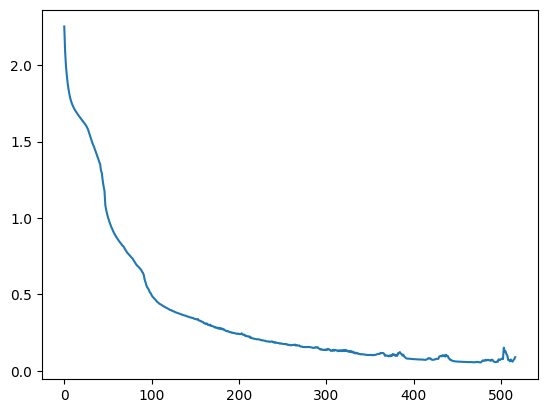

Correct classifications: 3386/3455 (98.0%)


In [64]:
#tf.random.set_seed(210138711)

r = 0.003
epochs = 1000
batch_size = 128
patience = 40

M = make_approx_model(p=3, q=3, r=r)
hist = train_approx_model(M=M, epochs=epochs, batch_size=batch_size, patience=patience)
plt.plot(hist.history['loss'])
plt.show()
print(f'Correct classifications: {check_model(M=M)}/{x_all.shape[0]} ({np.round(100*check_model(M=M)/x_all.shape[0], 2)}%)')

We can visualize the kernels of the first layer using the code below. In most cases the kernels do not seem to show any particular resemblance to the kernels we created to recognize specific pixel types, and there seem to be lots of possible local minima at which the model can arrive.

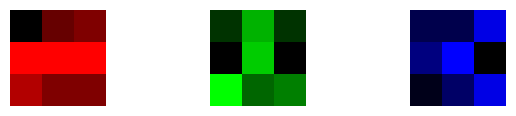

In [65]:
show_kernels(M=M)

## Example 7.3

This example aims to train models similar to the previous one, but initializing the weights of the first layer using the kernels from the first layer of the exact model. The `start_kernels` list should contain 3 digits from 0 to 9 representing the pixel types that the kernels are initalized to.

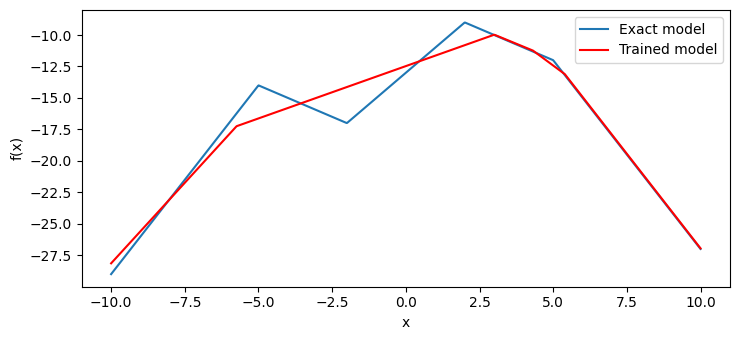

In [36]:
# Specify a in R^r, m in R^R+1, and c in R
a = [-5,-2,2,5]
m = [3,-1,2,-1,-3]
c = 1

# Specify r small (~0.05), samples and epochs large (100+)
r = 0.05
samples=100
epochs=10000

N = make_oned_model(a=np.array(a), m=np.array(m), c=c)
M = make_approx_model(N, r=r)
M = train_approx_model(M=M, N=N, samples=samples, epochs=epochs)
plot_trained_model(M=M, N=N)

Inspecting the weights of each model, we can see that the weights and bias terms in the first layer combine together to determine the locations of the corners as in the exact model. In the case that the trained model is able to match the exact model, the weights and biases of the second layer are adjusted to make the corresponding line segments (possibly in a different order).

In [34]:
print("Trained model")
print("Layer 1:")
[print(np.round(w, 2)) for w in N.layers[1].get_weights()]
print("Layer 2:")
[print(np.round(w, 2)) for w in N.layers[2].get_weights()]
print("Exact model")
print("Layer 1:")
[print(np.round(w, 2)) for w in M.layers[1].get_weights()]
print("Layer 2:")
[print(np.round(w, 2)) for w in M.layers[2].get_weights()]
None

Trained model
Layer 1:
[[ 1. -1.  1.  1.  1.  1.]]
[ 0.  0.  5.  2. -2. -5.]
Layer 2:
[[ 3.]
 [-3.]
 [-4.]
 [ 3.]
 [-3.]
 [-2.]]
[1.]
Exact model
Layer 1:
[[ 0.59 -0.7  -1.04  0.54 -0.02  0.56]]
[-3.12  3.19  3.17  3.17 -0.89  3.27]
Layer 2:
[[-1.92]
 [-1.26]
 [-1.73]
 [-1.33]
 [-0.04]
 [-2.06]]
[7.97]


## Figure code

The following code produce the figures contained in this chapter.

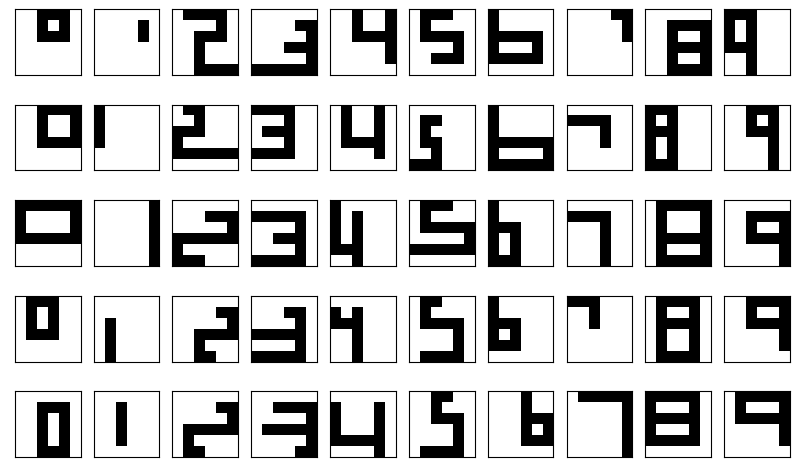

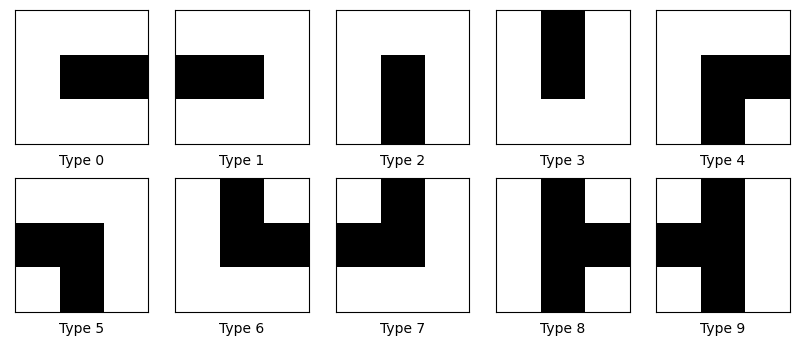

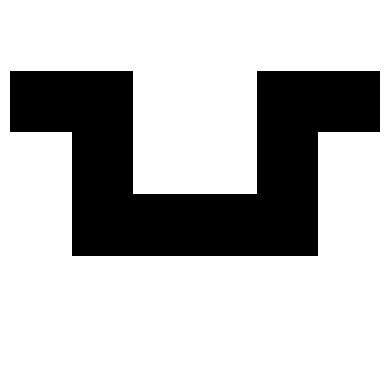

In [4]:
tf.random.set_seed(210138711)

# Figure 1
fig, axs = plt.subplots(5, 10, sharex='col', sharey='row', figsize=(10,6))

for i in range(5):
    for j in range(10):
        axs[i,j].imshow(random_image(j), cmap='Greys')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])


# Figure 2
fig, axs = plt.subplots(2, 5, sharex='col', sharey='row', figsize=(10,4))

pixels = [
    [[0, 0, 0], [0, 1, 1], [0, 0, 0]],
    [[0, 0, 0], [1, 1, 0], [0, 0, 0]],
    [[0, 0, 0], [0, 1, 0], [0, 1, 0]],
    [[0, 1, 0], [0, 1, 0], [0, 0, 0]],
    [[0, 0, 0], [0, 1, 1], [0, 1, 0]],
    [[0, 0, 0], [1, 1, 0], [0, 1, 0]],
    [[0, 1, 0], [0, 1, 1], [0, 0, 0]],
    [[0, 1, 0], [1, 1, 0], [0, 0, 0]],
    [[0, 1, 0], [0, 1, 1], [0, 1, 0]],
    [[0, 1, 0], [1, 1, 0], [0, 1, 0]]
]

pixels = np.array(pixels)

for i in range(2):
    for j in range(5):
        axs[i,j].imshow(pixels[5*i+j], cmap='Greys')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        axs[i,j].set(xlabel=f"Type {5*i+j}")


fig = plt.figure()
non_digit = np.array(
    [[0,0,0,0,0,0],
     [1,1,0,0,1,1],
     [0,1,0,0,1,0],
     [0,1,1,1,1,0],
     [0,0,0,0,0,0],
    [ 0,0,0,0,0,0]]
)

show_digit(non_digit)



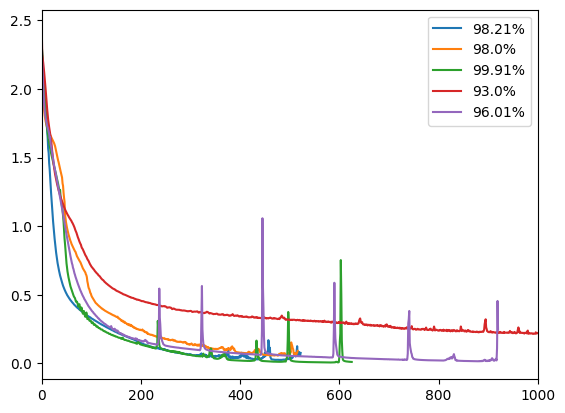

In [87]:
tf.random.set_seed(210138711)

r = 0.003
epochs = 1000
batch_size = 128
patience = 40

cols = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
models = []
hists = []
for i in range(5):
    models.append(make_approx_model(p=3, q=3, r=r))
    hists.append(train_approx_model(M=models[i], epochs=epochs, batch_size=batch_size, patience=patience))
    plt.gca().set_xlim([0,1000])
    plt.plot(hists[i].history['loss'], color=cols[i], label=f'{np.round(100*check_model(M=models[i])/x_all.shape[0], 2)}%')

plt.gca().legend(loc='upper right', ncol=1)
plt.show()

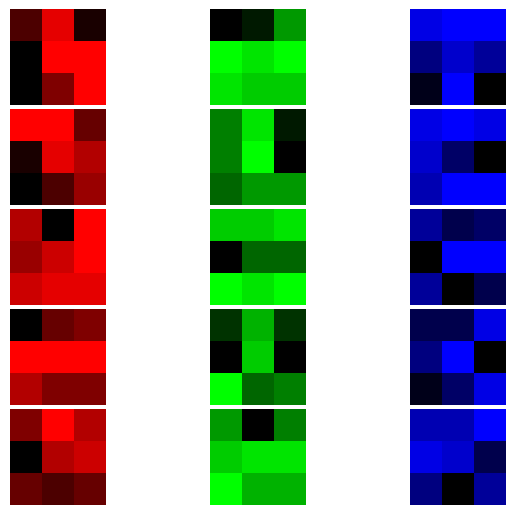

In [84]:
fig = plt.figure(figsize=(5, 1))

for i in range(5):
    w = models[i].layers[2].get_weights()[0].reshape(3, 3, 3).transpose(2, 0, 1)
    for j in range(3):
        cm0 = np.zeros([11, 4])
        for k in range(11):
            cm0[k, j] = k / 10
            cm0[k, 3] = 1
        cm = matplotlib.colors.ListedColormap(cm0)
        x = (2*j - 0.02) / 5
        ax = fig.add_axes([x, 0.02 + i, 0.96 / 5, 0.96])
        ax.set_axis_off()
        ax.imshow(w[j], cmap=cm)